<a href="https://colab.research.google.com/github/dmcdonald98/Assignment-5/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

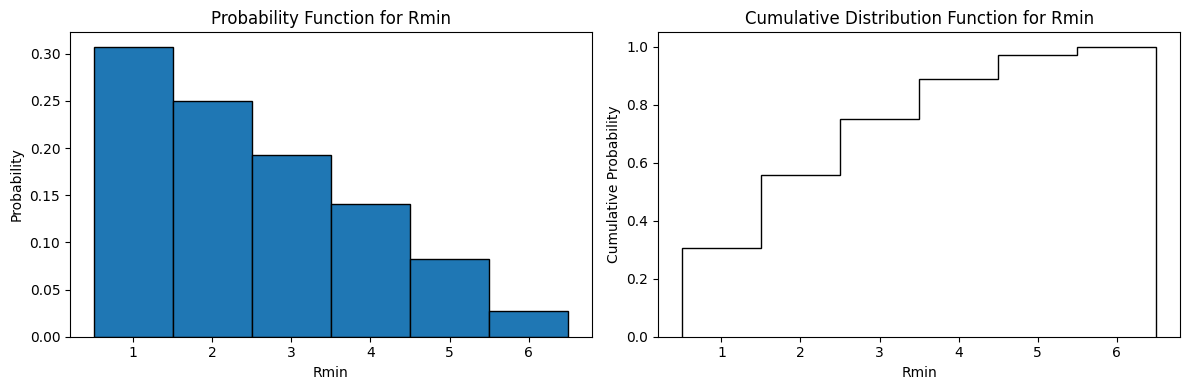

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def simulate_and_plot(num_simulations):
    outcomes = []

    for _ in range(num_simulations):
        # Simulate rolling two dice
        dice_rolls = np.random.randint(1, 7, size=2)
        min_value = np.min(dice_rolls)
        outcomes.append(min_value)

    # Plotting Probability Function
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.hist(outcomes, bins=np.arange(0.5, 7.5, 1), density=True, edgecolor='black')
    plt.title('Probability Function for Rmin')
    plt.xlabel('Rmin')
    plt.ylabel('Probability')

    # Plotting Cumulative Distribution Function
    plt.subplot(1, 2, 2)
    plt.hist(outcomes, bins=np.arange(0.5, 7.5, 1), density=True, cumulative=True, histtype='step', edgecolor='black')
    plt.title('Cumulative Distribution Function for Rmin')
    plt.xlabel('Rmin')
    plt.ylabel('Cumulative Probability')

    plt.tight_layout()
    plt.show()

# Number of simulations to run
num_simulations = 100000

# Simulate and plot using the law of large numbers
simulate_and_plot(num_simulations)

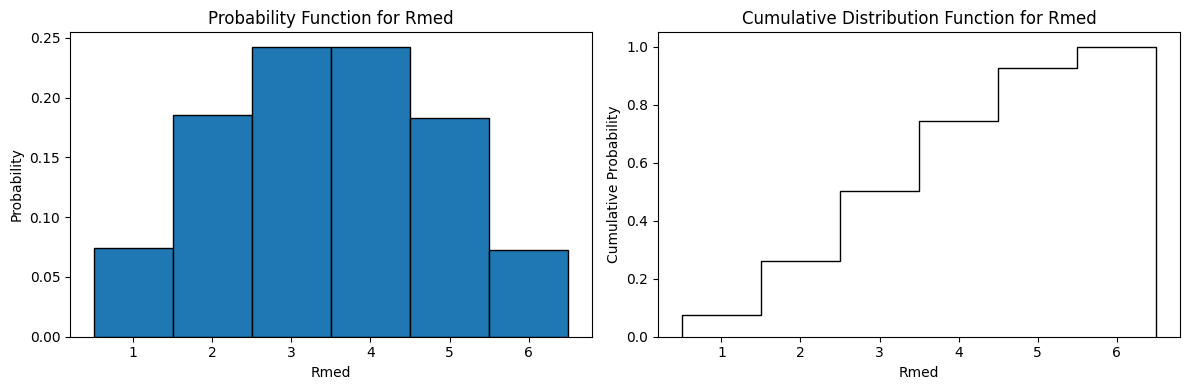

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def simulate_and_plot_scenario_2(num_simulations):
    outcomes = []

    for _ in range(num_simulations):
        # Simulate rolling three dice
        dice_rolls = np.random.randint(1, 7, size=3)
        middle_value = np.median(dice_rolls)
        outcomes.append(middle_value)

    # Plotting Probability Function
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.hist(outcomes, bins=np.arange(0.5, 7.5, 1), density=True, edgecolor='black')
    plt.title('Probability Function for Rmed')
    plt.xlabel('Rmed')
    plt.ylabel('Probability')

    # Plotting Cumulative Distribution Function
    plt.subplot(1, 2, 2)
    plt.hist(outcomes, bins=np.arange(0.5, 7.5, 1), density=True, cumulative=True, histtype='step', edgecolor='black')
    plt.title('Cumulative Distribution Function for Rmed')
    plt.xlabel('Rmed')
    plt.ylabel('Cumulative Probability')

    plt.tight_layout()
    plt.show()

# Number of simulations to run
num_simulations = 100000

# Simulate and plot using the law of large numbers
simulate_and_plot_scenario_2(num_simulations)

In [ ]:
import random

def simulate_process():
    total = 0
    while True:
        # Roll a six-sided die
        roll = random.randint(1, 6)

        # If the roll is 1, 2, 3, 4, or 5, add it to the total and stop
        if roll in [1, 2, 3, 4, 5]:
            total += roll
            break
        # If the roll is 6, add it to the total and roll the die again
        else:
            total += roll

    return total

def estimate_expected_value(num_simulations):
    total_sum = 0
    for _ in range(num_simulations):
        total_sum += simulate_process()

    expected_value = total_sum / num_simulations
    return expected_value

# Number of simulations to run
num_simulations = 100000

# Estimate the expected value using the law of large numbers
result = estimate_expected_value(num_simulations)

print(f"Estimated Expected Value: {result}")

Estimated Expected Value: 4.17423


In [1]:
import pandas as pd
import numpy as np
import bootstrapped.bootstrap as bs
from bootstrapped import compare_functions as bs_compare
from bootstrapped import stats_functions as bs_stats

# Load the data
data = pd.read_csv("mammogram.csv")

# Task 1: Cross tabulate treatment and breast_cancer_death
cross_tab = pd.crosstab(data['treatment'], data['breast_cancer_death'])
print("Cross-tabulation of treatment and breast_cancer_death:")
print(cross_tab)

# Task 2: Bootstrap the densities and distributions of survival rates for the two groups
control_group = data[data['treatment'] == 'control']['breast_cancer_death'] == 'no'
mammogram_group = data[data['treatment'] == 'mammogram']['breast_cancer_death'] == 'no'

# Bootstrap resampling for control and mammogram groups
num_bootstrap_samples = 10000  # Adjust this number based on your system's memory capacity
diff_survival_rates = []

for _ in range(num_bootstrap_samples):
    # Resample with replacement
    control_sample = np.random.choice(control_group, size=len(control_group), replace=True)
    mammogram_sample = np.random.choice(mammogram_group, size=len(mammogram_group), replace=True)

    # Calculate survival rates for the resampled samples
    control_survival_rate = np.mean(control_sample)
    mammogram_survival_rate = np.mean(mammogram_sample)

    # Calculate the difference in survival rates
    diff_survival_rate = mammogram_survival_rate - control_survival_rate
    diff_survival_rates.append(diff_survival_rate)

# Construct a 99% confidence interval for the difference in outcomes between the two groups
diff_bootstrap = bs.bootstrap(np.array(diff_survival_rates), stat_func=bs_stats.mean)

# Display results
print("\nBootstrap Statistics:")
print(f"Control Group 25-year Survival Rate: {np.mean(control_group) * 100:.2f}%")
print(f"Mammogram Group 25-year Survival Rate: {np.mean(mammogram_group) * 100:.2f}%")
print(f"Difference in 25-year Survival Rates (Bootstrap 99% CI): {diff_bootstrap.value * 100:.2f}%")
print(f"99% Confidence Interval: ({diff_bootstrap.lower_bound * 100:.2f}%, {diff_bootstrap.upper_bound * 100:.2f}%)")

# Task 4: Discuss potential biases and limitations
print("\nDiscussion:")
print("These results may be subject to various biases and limitations.")
print("Additional data on patient demographics, health conditions, and screening protocols could provide more context.")

Cross-tabulation of treatment and breast_cancer_death:
breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500

Bootstrap Statistics:
Control Group 25-year Survival Rate: 98.88%
Mammogram Group 25-year Survival Rate: 98.89%
Difference in 25-year Survival Rates (Bootstrap 99% CI): 0.01%
99% Confidence Interval: (0.01%, 0.01%)

Discussion:
These results may be subject to various biases and limitations.
Additional data on patient demographics, health conditions, and screening protocols could provide more context.
